<b>1.1.Derive the approximation when the interpolating polynomial is $P(x)=y_0$.</b> 

Assuming that $h$ is the interval size between two adjacents points $a$ and $b$. The integral of the interpolating polynomial is then just

$$
I = (b-a) y_0
$$

The error is 

$$
E = \frac{h^2}{2} f^{(1)} (\xi), \ \ \ \xi \in [a,b]
$$

This is a zeroth order approximation and the trapezium method is a first order.

<b>1.2. Extend the results from a. for a composite formula.</b>

![w2 lab1.png](<attachment:w2 lab1.png>)

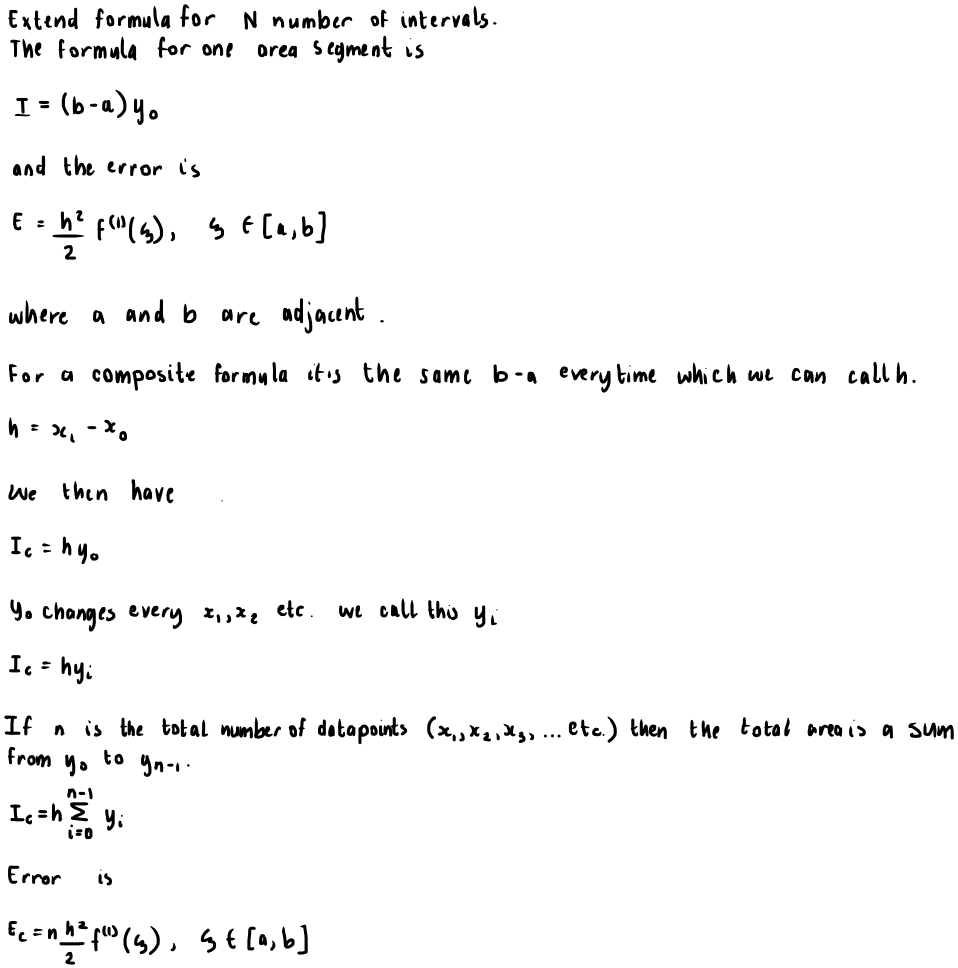

<b>1.3. Implement the method as a Python callable function, and use it to approximate</b>
<br>
$$
\int_0^9 x^2\sin(x) dx.
$$

<b>
Plot the error as a function of the number of intervals used, and compare with both Trapezium and
Simpson methods. [Python]
</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Absolute Error $E_{abs}$ vs Number of Steps $N$')

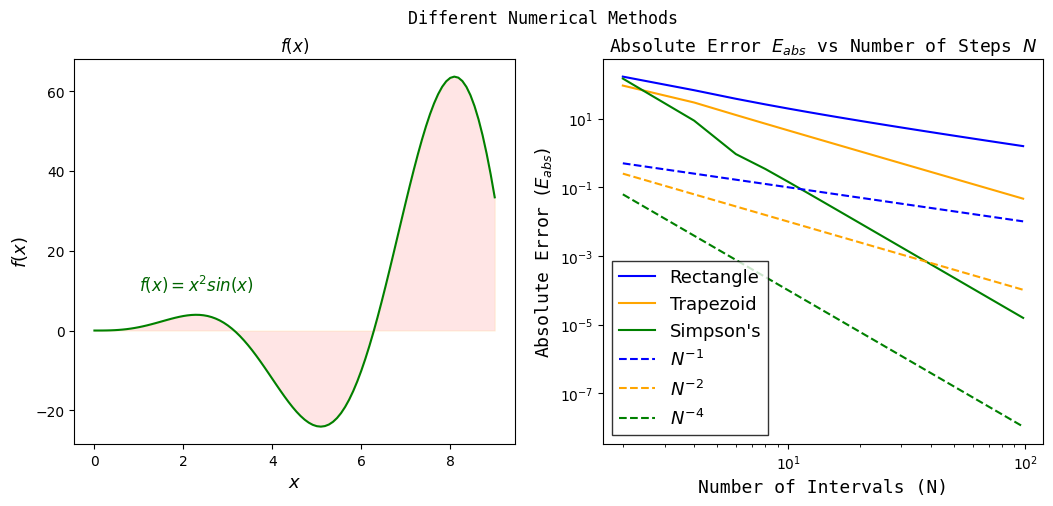

In [31]:
# create integral functions
def int_rec(y,h):
    """
    rectangular method
    """
    return h * (np.sum(y) - y[-1])

def int_com(y,h):
    """
    composite trapezoid method
    """
    return (h/2) * (2 * np.sum(y) - y[0] - y[-1])

def int_sim(y,h):
    """
    simpson's method
    """
    return (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2])) * h/3

# find analytical solution
sol = -2 -79 * np.cos(9) + 18 * np.sin(9)

# find error of integral of f(x)
a, b = 0, 9 # set limits
n = np.arange(2, 100, 2) # number of intervals (N)

# create empty arrays for errors
E_rec = np.zeros(len(n)); E_com = np.zeros(len(n)); E_sim = np.zeros(len(n))

# find absolute error for each N
for k in range(len(n)):
    h = (b-a) / n[k] # create step size h[k] using n[k]
    x = np.linspace(a, b, n[k]+1) # create x input
    y = (x**2) * np.sin(x) # f(x)
    
    # find approximations
    I_r = int_rec(y,h)
    I_t = int_com(y,h)
    I_s = int_sim(y,h)
    
    # find error E for each approximation & step size (N)
    E_rec[k] = abs(I_r - sol)
    E_com[k] = abs(I_t - sol)
    E_sim[k] = abs(I_s - sol)

# create dataset
x = np.linspace(0, 9, 100)
y = (x**2) * np.sin(x)

# format graph
font = {'family':'monospace', 'color':'black', 'size':13}
title = {'family':'monospace', 'color':'black', 'size':18} # set font dictionary

# plot graphs
fig, axs = plt.subplots(1, 2, figsize=(12.5,5))
fig.suptitle('Different Numerical Methods', fontdict=title)

axs[0].plot(x, y, color='g') # f(x)
axs[0].set_xlabel('$x$', fontdict=font)
axs[0].set_ylabel('$f(x)$', fontdict=font)
axs[0].set_title('$f(x)$')
axs[0].fill_between(x, y, color='red', alpha=.1, edgecolor='orange')
axs[0].annotate('$f(x) = x^{2} sin(x)$', xy=(1,10), fontsize=12, color='darkgreen')

axs[1].loglog(n, E_rec, '-', label='Rectangle', color='blue') # approximations
axs[1].loglog(n, E_com, '-', label='Trapezoid', color='orange')
axs[1].loglog(n, E_sim, '-', label="Simpson's", color='green')

axs[1].loglog(n, 1/n, '--', label='$N^{-1}$', color='blue')
axs[1].loglog(n, 1/n**2, '--', label='$N^{-2}$', color='orange')
axs[1].loglog(n, 1/n**4, '--', label='$N^{-4}$', color='green')
axs[1].set_xlabel('Number of Intervals (N)', fontdict=font)
axs[1].set_ylabel('Absolute Error $(E_{abs})$', fontdict=font)
axs[1].legend(loc='best', fontsize=13, fancybox=False, edgecolor='k')
axs[1].set_title("Absolute Error $E_{abs}$ vs Number of Steps $N$", fontdict=font)

<b> 1.4 Following the bounding technique seen in the Lecture, find the number of intervals needed for achieving $5$ exact decimals. Compare the results with those from the Lecture notes, and use Python to verify the result. ``[Hand & Python]`` </b>

![w2 lab2.png](<attachment:w2 lab2.png>)
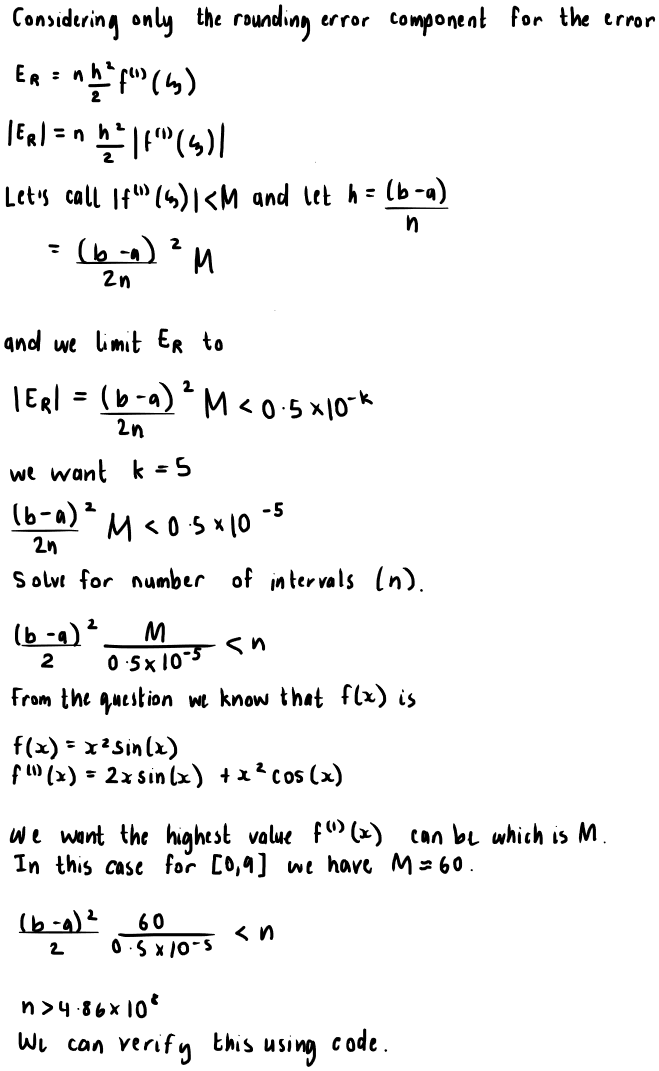

rectangle method
number of points:  486000001
error:  3.0908877590718475e-07


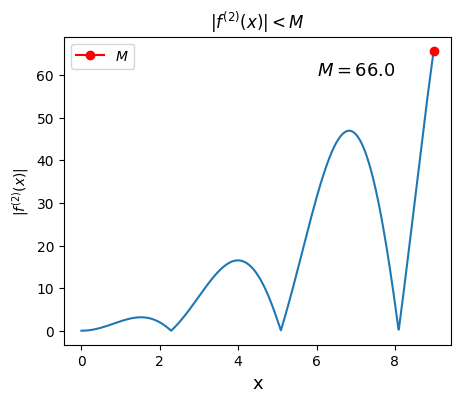

In [4]:
# create data
a,b = 0,9 # integral limits
x = np.arange(0, 9, 0.01)

# find f'(x)
fd = abs(2 * x * np.sin(x) + (x**2) * np.cos(x))

# find minimum number of steps (n)
n = (b-a)**2 / 2 * 66 / (0.5 * 10**(-5)) # for k = 5
n_ceil = int(np.ceil(n)) # round number of steps (n)

# evaluate integrand using n steps
x_r = np.linspace(a, b, n_ceil + 1) 
I_r = int_rec((x_r**2) * np.sin(x_r), (b-a) / n_ceil) # analytical solution
E_r = abs(sol - I_r) # absolute error

print('rectangle method')
print('number of points: ', len(x_r))
print('error: ', E_r)

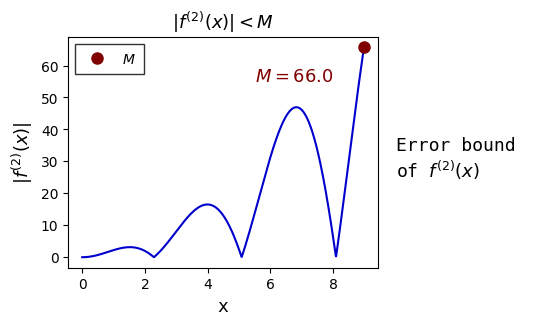

In [54]:
# plot graphs
plt.figure(figsize=(4,3))
plt.plot(x, abs(fd), 'mediumblue') # |f'(x)|
plt.plot(x[np.where(fd==max(fd))], max((fd)), color='maroon', marker='o', markersize=8, lw=0, label='$M$') # |f'(x)| < M
plt.text(5.5, 55, '$M = {}$'.format(np.round(max((fd)))), fontdict=font, color='maroon')
plt.text(10, 25, 'Error bound \nof $f^{(2)}(x)$', fontdict=font)


plt.xlabel('x', fontdict=font)
plt.ylabel('$|f^{(2)}(x)|$', fontdict=font)
plt.title('$|f^{(2)}(x)| < M$', fontdict=font)
plt.legend(loc='best', edgecolor='black', fancybox=False, borderpad=.6)

We can see that the absolute error $E_R$ is indeed $|E_R|<0.5 \times 10^{-5}$ i.e. our solution will be accurate to $k=5$ decimal places, as intended. The $n$ number of intervals stated allows us to obtain this level of precision.

# 2.1. Richard's Extrapolation
<b> 2.1. Using this formula, show that</b>

We can use different sized trapezoids by using different numbers of subintervals $n$ e.g. for two different sizes we can use $n_1$ and $n_2$.

![w2 lab3.png](<attachment:w2 lab3.png>)
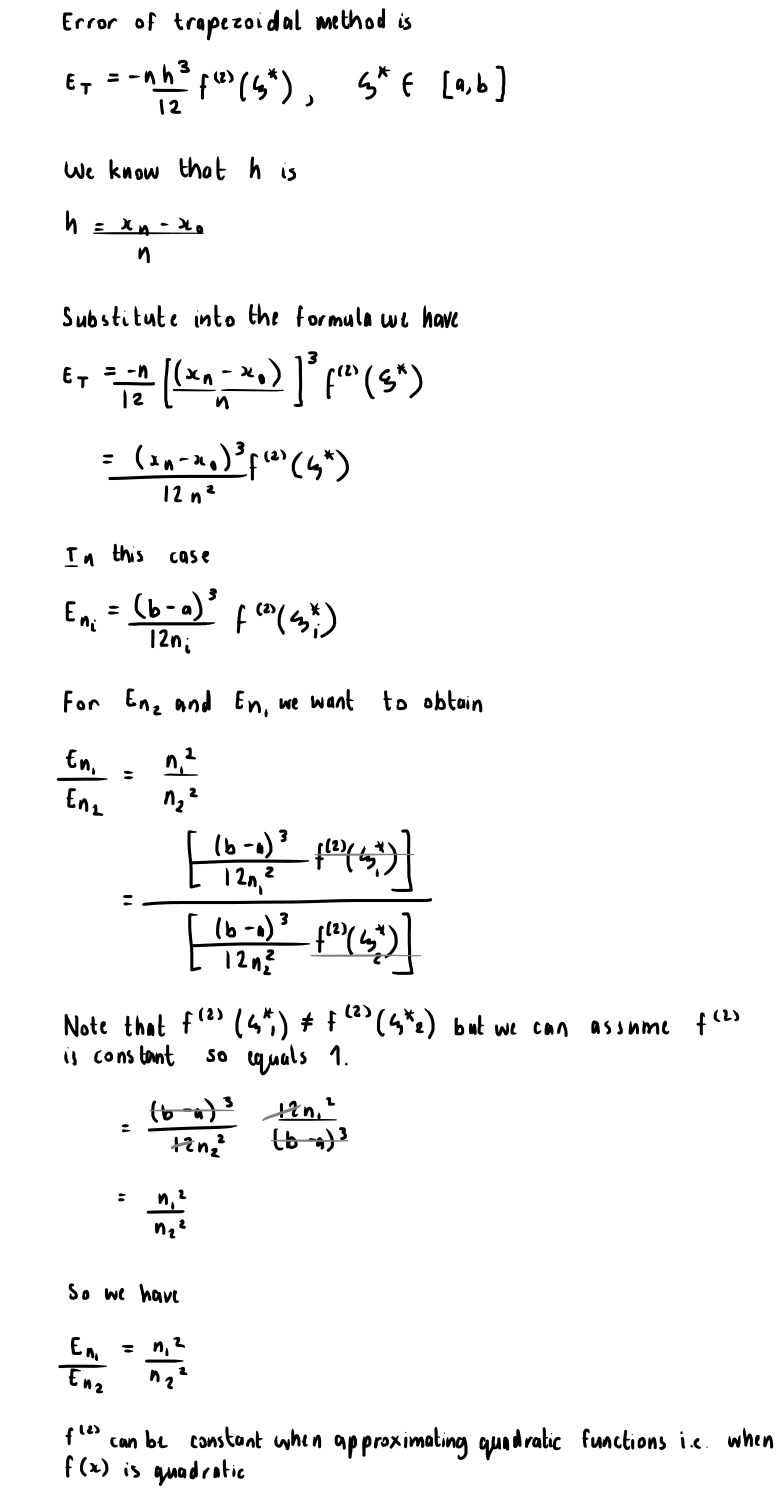

<b> 2.2. 

![w2 lab4.png](<attachment:w2 lab4.png>)
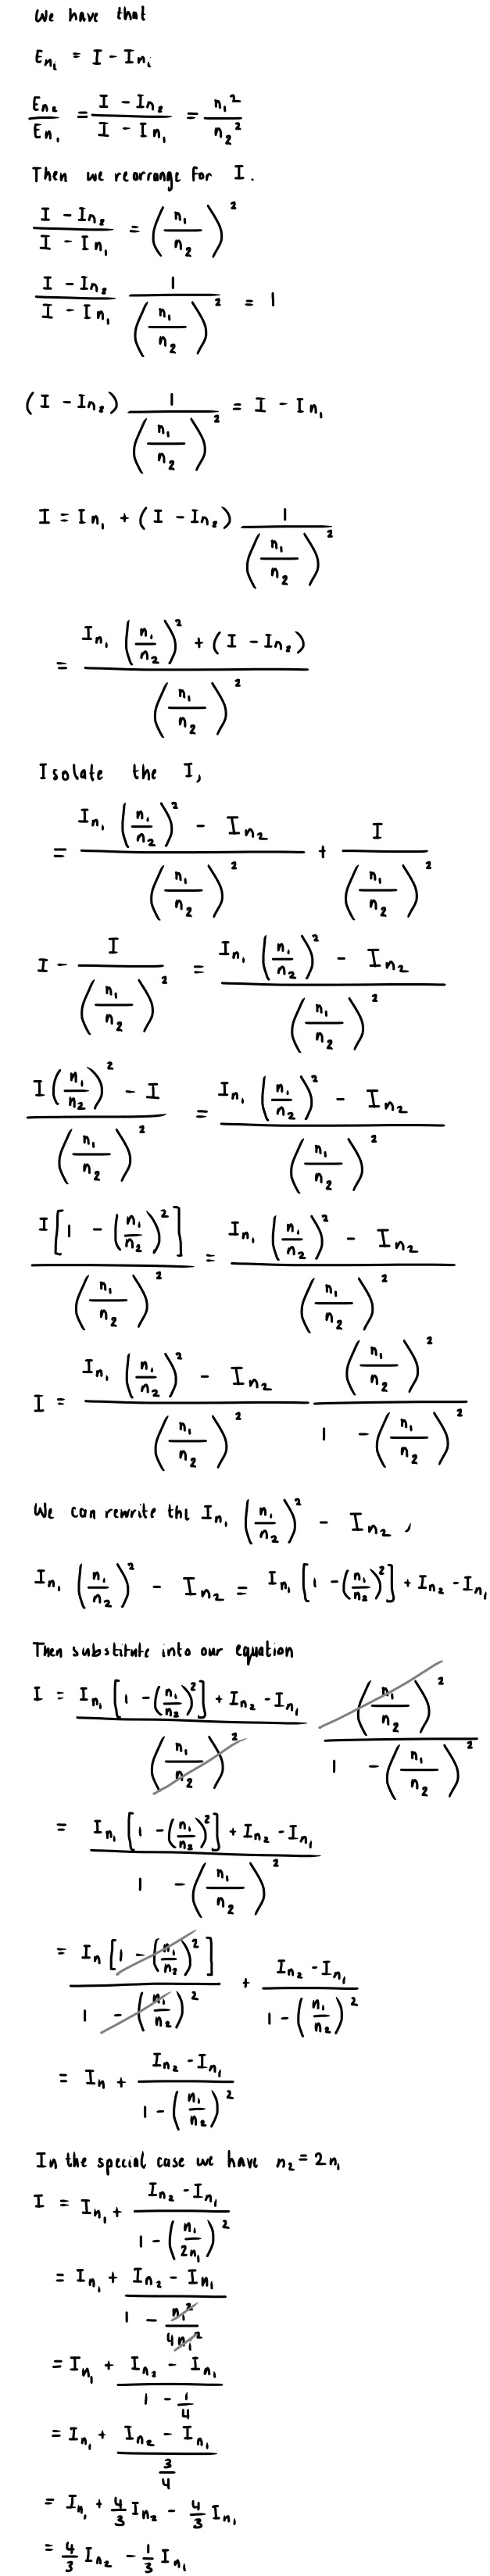

<b> 2.3. <b>

![w2 lab5.png](<attachment:w2 lab5.png>)
![w2 lab6.png](<attachment:w2 lab6.png>)
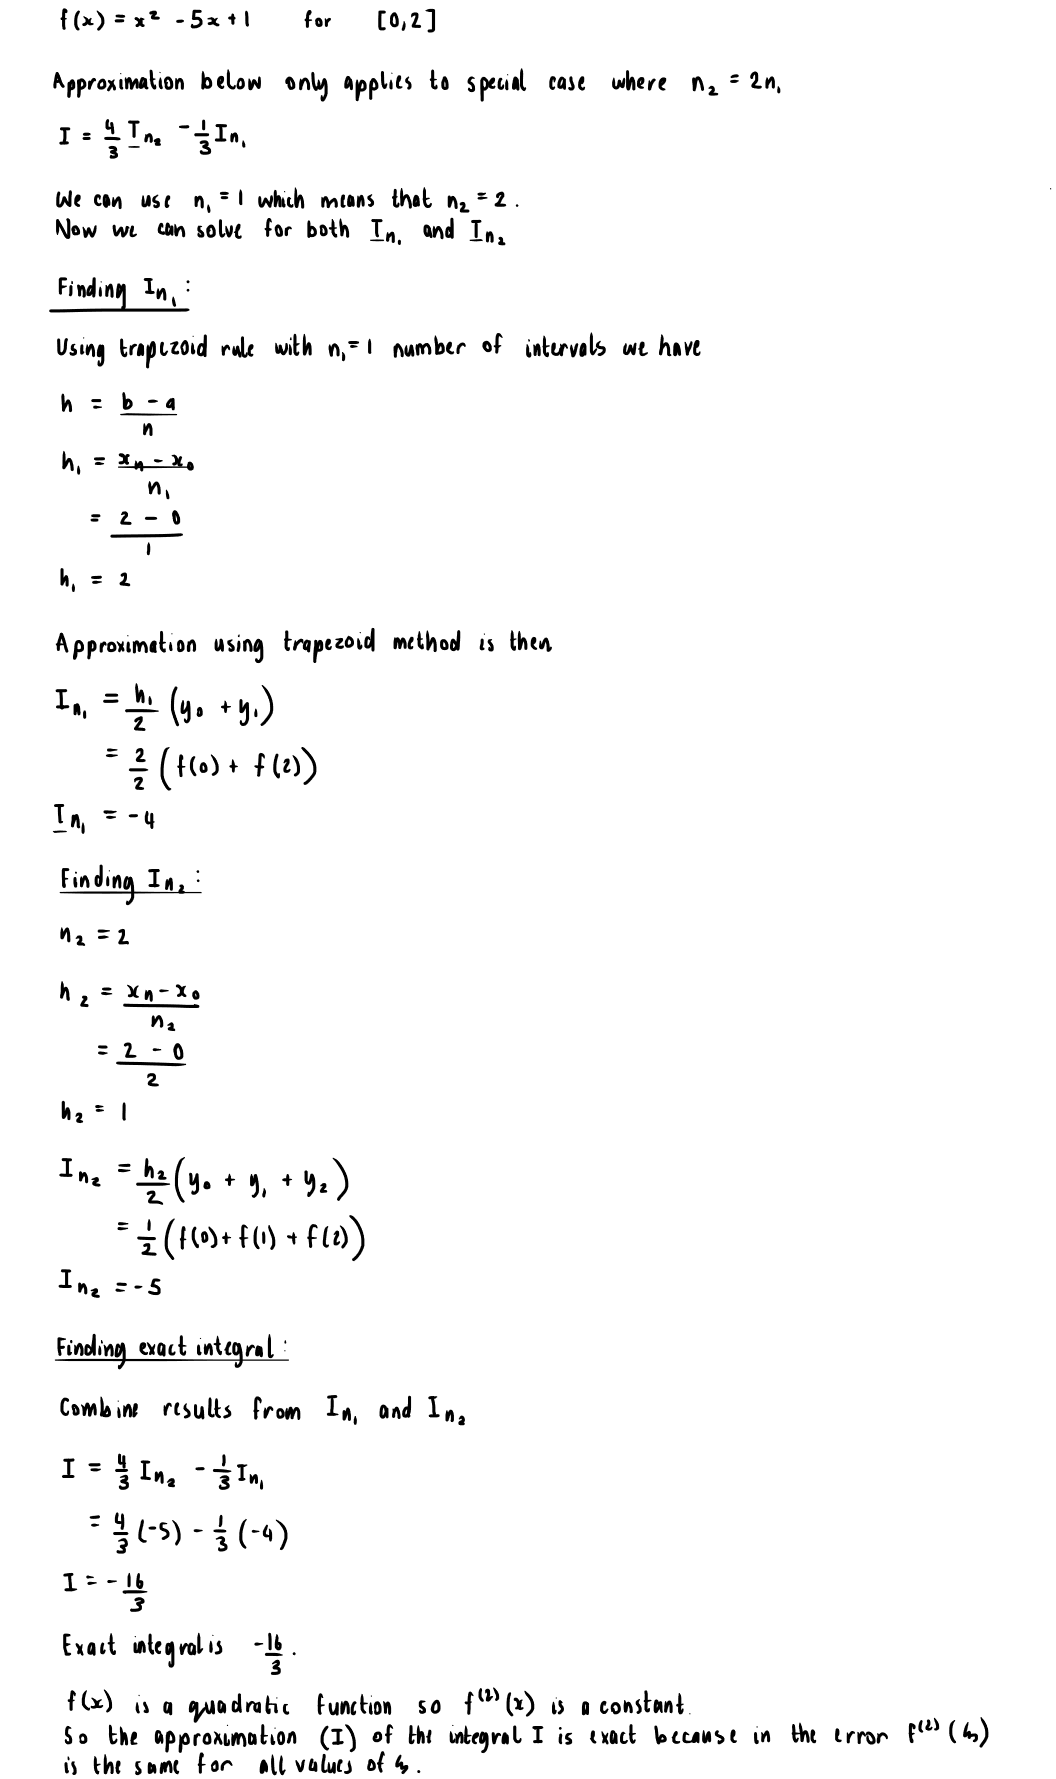
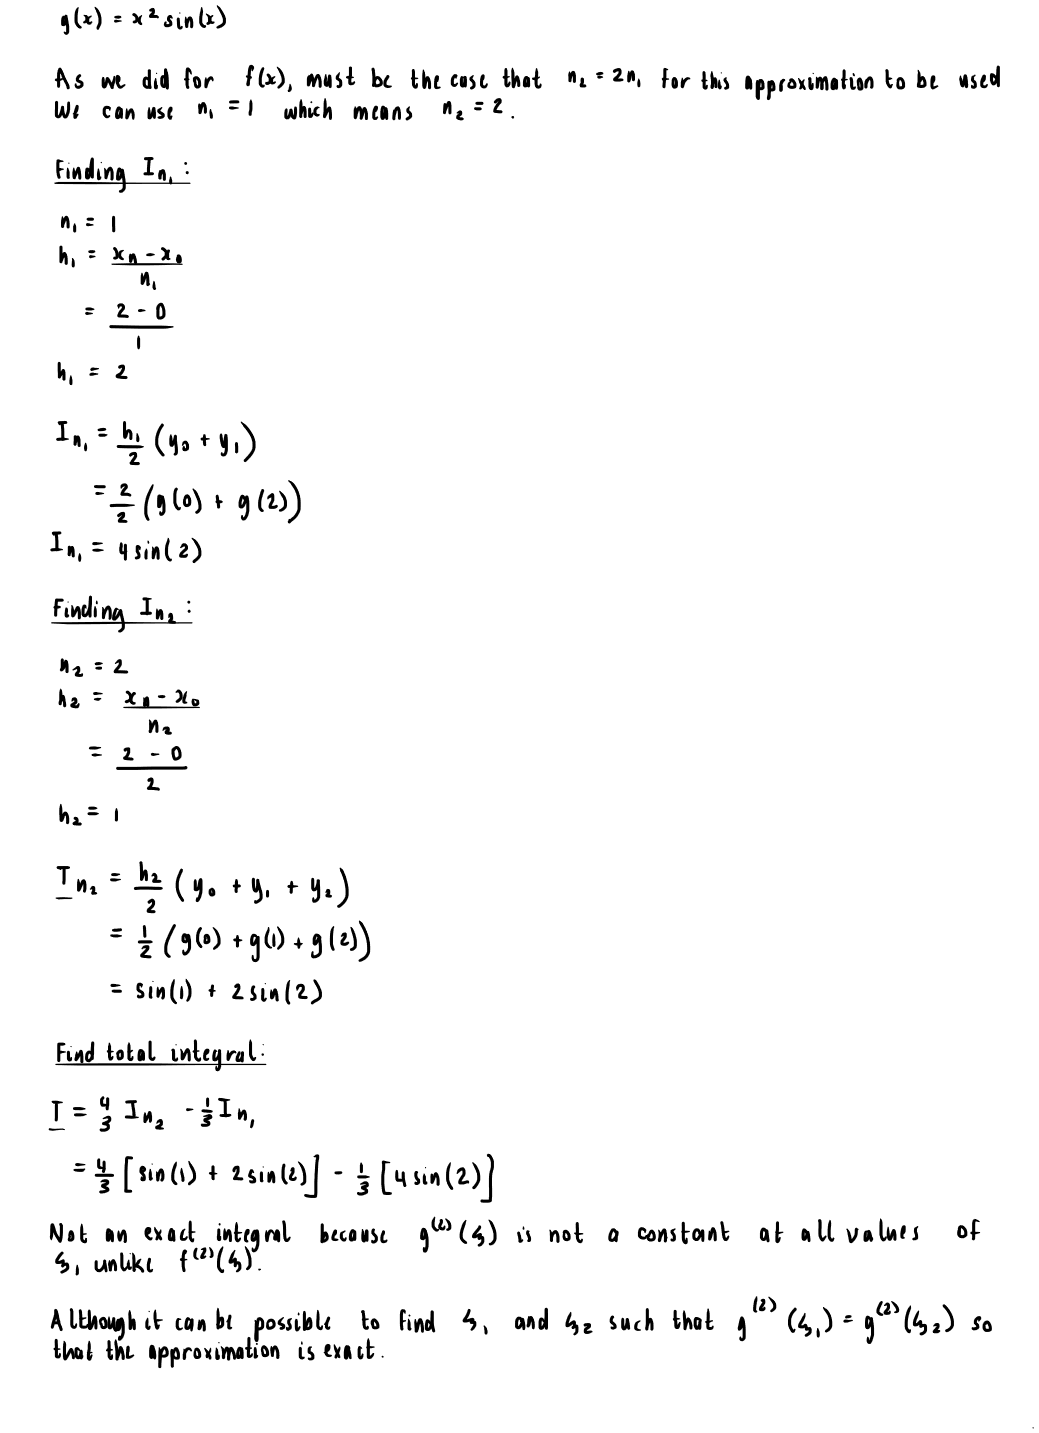

<b>3.1. </b>

```
def al(t, x, y): 
    h = t[1] - t[0] 
    dx = (x[2::] - x[0:-2]) / (2 * h) 
    dy = (y[2::] - y[0:-2]) / (2 * h) 
    f = np.sqrt(dx**2 + dy**2) 
    L = np.sum(f[1::]) * h 
return L 
```

`dx` calculates the change in `x` with respect to `t` & likewise, `dy` calculates the change in `y` with respect to `t` i.e. `dx` $= x^{(1)}(t)$ and `dy` $= y^{(1)}(t)$.

`f` then gives an approximation to $\sqrt{x^{(1)}(t) + y^{(1)}(t)}$ and `L` integrates $\sqrt{x^{(1)}(t) + y^{(1)}(t)}$ using the rectangular method.

In short, `al(t, x, y)` returns an approximation to the following

$$
\int_{a}^{b} \sqrt{x^{(1)}(t) + y^{(1)}(t)}
$$

i.e. the arc length of parametric curve.


Integral of Cardioid Function
Numerical Approximation: 15.852947660302835
Wikipedia: 16


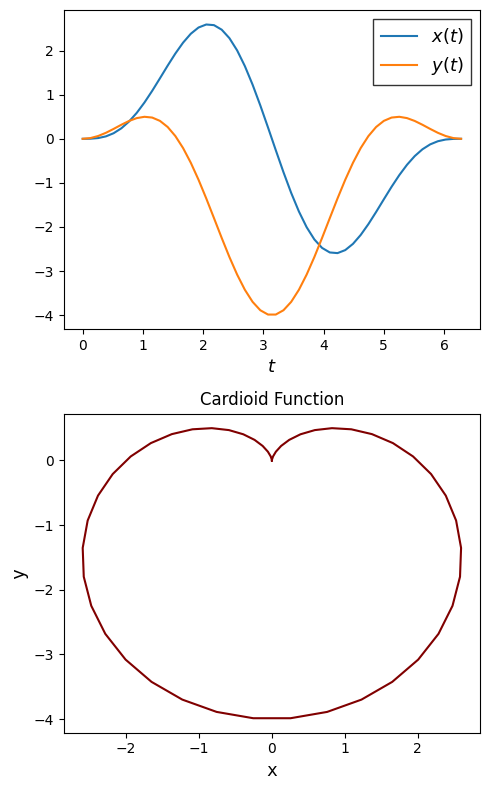

In [58]:
# create data
t = np.linspace(0, 2*np.pi)
x = 2 * (1 - np.cos(t)) * np.sin(t)
y = 2 * (1 - np.cos(t)) * np.cos(t)

# create function for arc length
def al(t, x, y):
    h = t[1] - t[0]
    dx = (x[2::] - x[0:-2]) / (2 * h) 
    dy = (y[2::] - y[0:-2]) / (2 * h)
    f = np.sqrt(dx**2 + dy**2)

    # find rectangle approximation
    L = np.sum(f[1::]) * h 
    return L

# find integral approximation
I = al(t, x, y)

# plot graphs
fig, axs = plt.subplots(2,1, figsize=(5,8))


axs[0].plot(t, x, label='$x(t)$') # x(t)
axs[0].plot(t, y, label='$y(t)$') # y(t)
axs[0].set_xlabel('$t$', fontdict=font)
axs[0].legend(loc='best', fontsize=13, fancybox=False, edgecolor='k')

axs[1].plot(x, y, color='maroon') # cardioid function
axs[1].set_ylabel('y', fontdict=font)
axs[1].set_xlabel('x', fontdict=font)
axs[1].set_title('Cardioid Function')

fig.tight_layout()
print('Integral of Cardioid Function')
print('Numerical Approximation:', I)
print('Wikipedia:', 16)